In [659]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [660]:
df = pd.read_csv('movies_initial.csv')
df = df[df["imdbVotes"] >= 1000]
df

imdbID                                  title  year     rating  \
0            1                             Carmencita  1894  NOT RATED   
1            5                       Blacksmith Scene  1893    UNRATED   
4           10  Employees Leaving the Lumi�re Factory  1895        NaN   
5           12                 The Arrival of a Train  1896        NaN   
6           14          Tables Turned on the Gardener  1895        NaN   
...        ...                                    ...   ...        ...   
45612  4635372                          Fly Away Solo  2015        NaN   
45664  4679210                                 Premam  2015        NaN   
45730  4727512                            Srimanthudu  2015        NaN   
45888   475380              Scenes of a Sexual Nature  2006          R   
46008  4195278                     Bana Masal Anlatma  2015        NaN   

       runtime                     genre    released  \
0        1 min        Documentary, Short         NaN   
1        1 min                     Short  1893-05-09   
4        1 min        Documentary, Short  1895-03-22   
5        1 min        Documentary, Short  1896-01-01   
6        1 min             Comedy, Short         NaN   
...        ...                       ...         ...   
45612  109 min                     Drama  2015-06-24   
45664  156 min    Comedy, Drama, Romance  2015-05-22   
45730  158 min             Action, Drama  2015-08-07   
45888   91 min    Comedy, Drama, Romance         NaN   
46008  103 min  Comedy, Fantasy, Romance  2015-01-09   

                             director                    writer  \
0                William K.L. Dickson                       NaN   
1                William K.L. Dickson                       NaN   
4                       Louis Lumi�re                       NaN   
5      Auguste Lumi�re, Louis Lumi�re                       NaN   
6                       Louis Lumi�re                       NaN   
...                               ...                       ...   
45612                  Neeraj Ghaywan              Varun Grover   
45664                Alphonse Puthren          Alphonse Puthren   
45730                  Koratalla Siva            Koratalla Siva   
45888                         Ed Blum             Aschlin Ditta   
46008                     Burak Aksak  Burak Aksak, Burak Aksak   

                                                    cast  ...  imdbRating  \
0                                             Carmencita  ...         5.9   
1                               Charles Kayser, John Ott  ...         6.2   
4                                                    NaN  ...         6.9   
5                                                    NaN  ...         7.3   
6                           Fran�ois Clerc, Beno�t Duval  ...         7.1   
...                                                  ...  ...         ...   
45612  Richa Chadda, Sanjay Mishra, Vicky Kaushal, Vi...  ...         8.2   
45664  Nivin Pauly, Krishnasankar, Sai Pallavi, Anupa...  ...         8.2   
45730  Jagapathi Babu, Mahesh Babu, Shruti K. Haasan,...  ...         8.3   
45888  Holly Aird, Eileen Atkins, Hugh Bonneville, To...  ...         6.1   
46008  Hande Dogandemir, Fatih Artman, Cengiz Bozkurt...  ...         8.1   

       imdbVotes                                             poster  \
0         1032.0  https://m.media-amazon.com/images/M/MV5BMjAzND...   
1         1189.0                                                NaN   
4         3469.0                                                NaN   
5         5043.0  https://m.media-amazon.com/images/M/MV5BMjEyND...   
6         2554.0                                                NaN   
...          ...                                                ...   
45612     1273.0  https://m.media-amazon.com/images/M/MV5BMTU4NT...   
45664     1654.0                                                NaN   
45730     3246.0                                                NaN   
45888 

In [661]:
df.describe()

imdbID   metacritic    imdbRating     imdbVotes
count  2.214200e+04  7692.000000  22142.000000  2.214200e+04
mean   6.323814e+05    56.598284      6.496712  2.322801e+04
std    8.107426e+05    18.004372      1.182726  6.790026e+04
min    1.000000e+00     1.000000      1.200000  1.000000e+03
25%    8.884775e+04    44.000000      5.800000  1.805000e+03
50%    2.391470e+05    57.000000      6.700000  3.831000e+03
75%    1.029130e+06    70.000000      7.300000  1.311800e+04
max    4.727512e+06   100.000000      9.600000  1.521105e+06

In [662]:
df.dtypes

imdbID           int64
title           object
year            object
rating          object
runtime         object
genre           object
released        object
director        object
writer          object
cast            object
metacritic     float64
imdbRating     float64
imdbVotes      float64
poster          object
plot            object
fullplot        object
language        object
country         object
awards          object
lastupdated     object
type            object
dtype: object

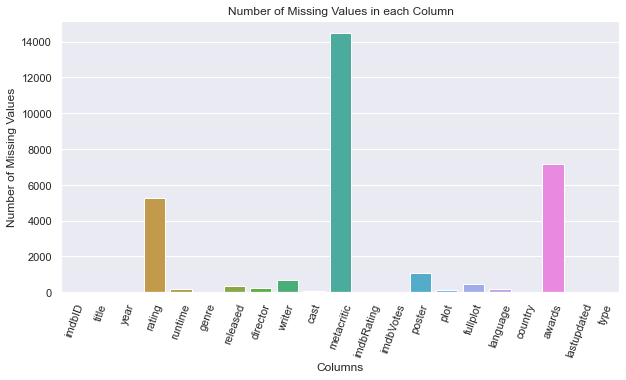

In [663]:
import seaborn as sns
import matplotlib.pyplot as plt
missing_vals = df.isnull().sum()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=missing_vals.index, y=missing_vals.values)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in each Column')
for item in ax.get_xticklabels():
    item.set_rotation(70)

plt.show()


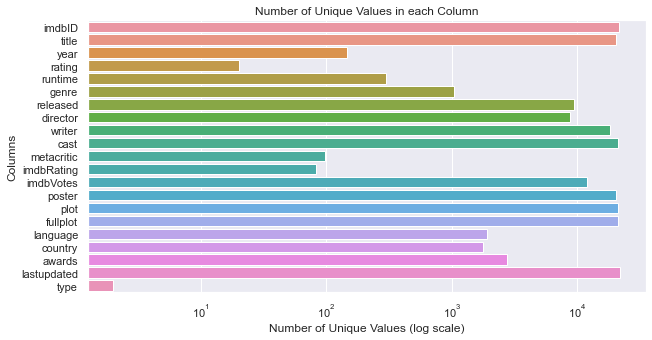

In [664]:
unique_vals = df.nunique()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=unique_vals.values, y=unique_vals.index, orient='horizontal')
ax.set_xscale('log')
plt.ylabel('Columns')
plt.xlabel('Number of Unique Values (log scale)')
plt.title('Number of Unique Values in each Column')

plt.show()

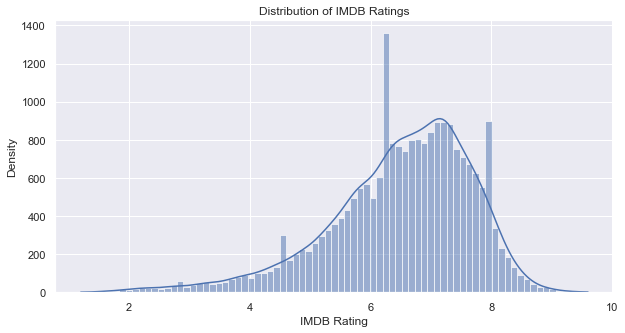

In [665]:
df_filt = df[df['imdbRating'].notnull()]

# Create a figure with a larger width
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the distribution of the 'imdb_rating' column
sns.histplot(data=df_filt, x="imdbRating", kde=True, ax=ax)

# Add labels and title to the plot
plt.xlabel('IMDB Rating')
plt.ylabel('Density')
plt.title('Distribution of IMDB Ratings')
plt.show()

In [666]:
value_counts = df['imdbRating'].value_counts().sort_index()
value_counts

1.2    1
1.5    3
1.6    7
1.7    6
1.8    6
      ..
9.2    9
9.3    3
9.4    2
9.5    2
9.6    1
Name: imdbRating, Length: 83, dtype: int64

In [667]:
genre_value_counts = df['genre'].value_counts()
genre_value_counts = genre_value_counts.sort_values(ascending=False)
genre_value_counts.head(10)

Drama                     1774
Comedy                    1149
Comedy, Drama              873
Drama, Romance             806
Comedy, Drama, Romance     754
Comedy, Romance            605
Horror                     465
Action, Crime, Drama       414
Horror, Thriller           388
Documentary                346
Name: genre, dtype: int64

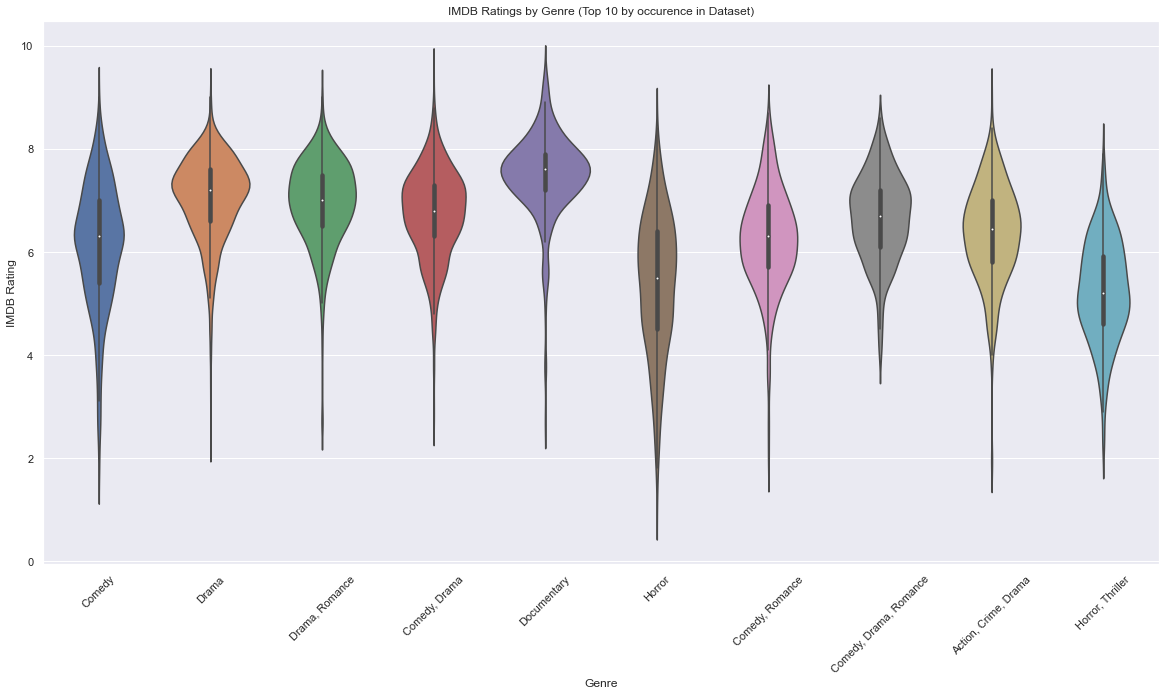

In [668]:
value_counts = df['genre'].value_counts()
top_genres = value_counts.head(10).index.tolist()
df_top_genres = df[df['genre'].isin(top_genres)]
fig, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(x="genre", y="imdbRating", data=df_top_genres, ax=ax, showmedians=True)
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings by Genre (Top 10 by occurence in Dataset)')
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

In [669]:
for index, row in df.iterrows():
    df.at[index, "year"] = df.at[index, "year"][0:4]
df["year"]=df["year"].astype("int")

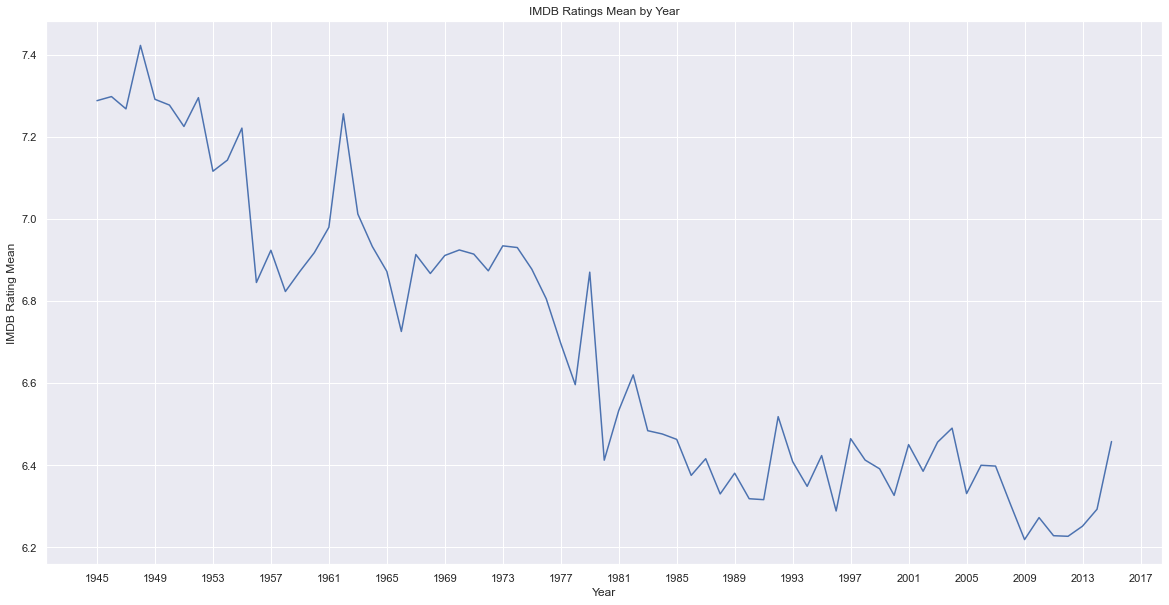

In [670]:
df_mean = df[df['imdbRating'].notna()]
df_mean = df_mean.where(df_mean["year"]>=1945)
df_mean = df_mean.where(df_mean["year"]<=2016)
df_mean = df_mean.groupby('year')['imdbRating'].mean().reset_index()
# Create the line plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="year", y="imdbRating", data=df_mean, ax=ax)

# Add labels
plt.xlabel('Year')
plt.ylabel('IMDB Rating Mean')
plt.title('IMDB Ratings Mean by Year')
xticks = range(int(df_mean['year'].min()), int(df_mean['year'].max()) + 5, 4)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
plt.show()


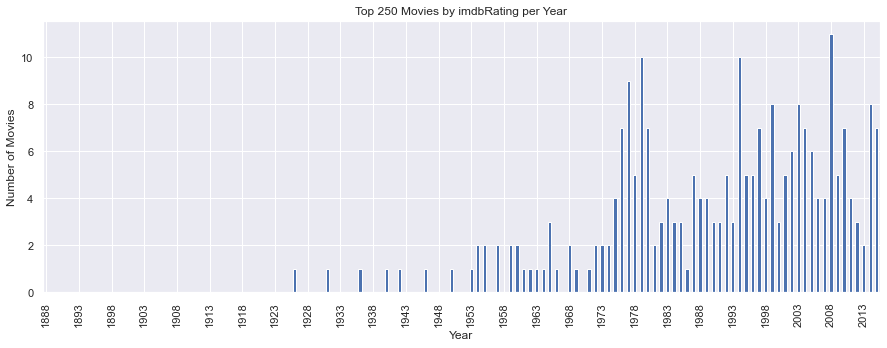

In [671]:
df_top_250 = df.nlargest(250, 'imdbRating')
df_top_250['year'] = df_top_250['year'].astype(int)
years = range(int(df['year'].min()), int(df['year'].max())+1)

# Create a DataFrame with year as the index and count of movies as the values
df_years = pd.DataFrame({'year': years})
df_years['count'] = 0
df_years = df_years.set_index('year')

# Count the number of movies in each year
for year, group in df_top_250.groupby(['year']):
    df_years.loc[year, 'count'] = len(group)

# Plot the bar chart
df_years['count'].plot(kind='bar', figsize=(15, 5))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Top 250 Movies by imdbRating per Year')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

In [672]:
import plotly.express as px
fig = px.bar(df_top_250, x='year', y='imdbRating', color='imdbRating',
             hover_data=['imdbVotes'],
             hover_name='imdbVotes',
             title="Top 250 movies distributed by year")
fig.update_traces(
                  hovertext=df_top_250['title'])
fig.update_layout(
    yaxis=dict(
        showticklabels=False
    )
)
fig.show()

In [673]:
import plotly.express as px
df_top_250 = df.nlargest(250, 'imdbRating')
df_top_250['year'] = df_top_250['year'].astype(int)
df_top_250 = df_top_250[df_top_250["imdbVotes"] >= 25000]
fig = px.bar(df_top_250, x='year', y='imdbRating', color='imdbRating',
             hover_data=['imdbVotes'],
             hover_name='imdbVotes',
             title="Top movies distributed by year (Real popular movies by no of votes)")
fig.update_traces(
                  hovertext=df_top_250['title'])
fig.update_layout(
    yaxis=dict(
        showticklabels=False
    )
)
fig.show()

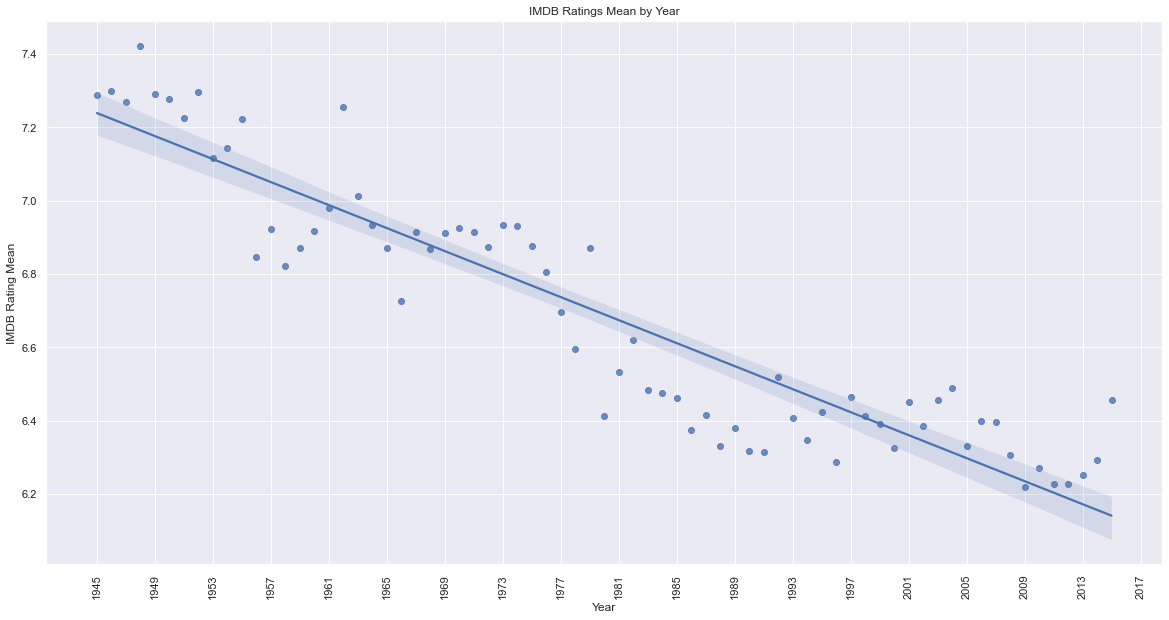

In [674]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="year", y="imdbRating", data=df_mean, ax=ax)
plt.xlabel('Year')
plt.ylabel('IMDB Rating Mean')
plt.title('IMDB Ratings Mean by Year')
xticks = range(int(df_mean['year'].min()), int(df_mean['year'].max()) + 5, 4)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

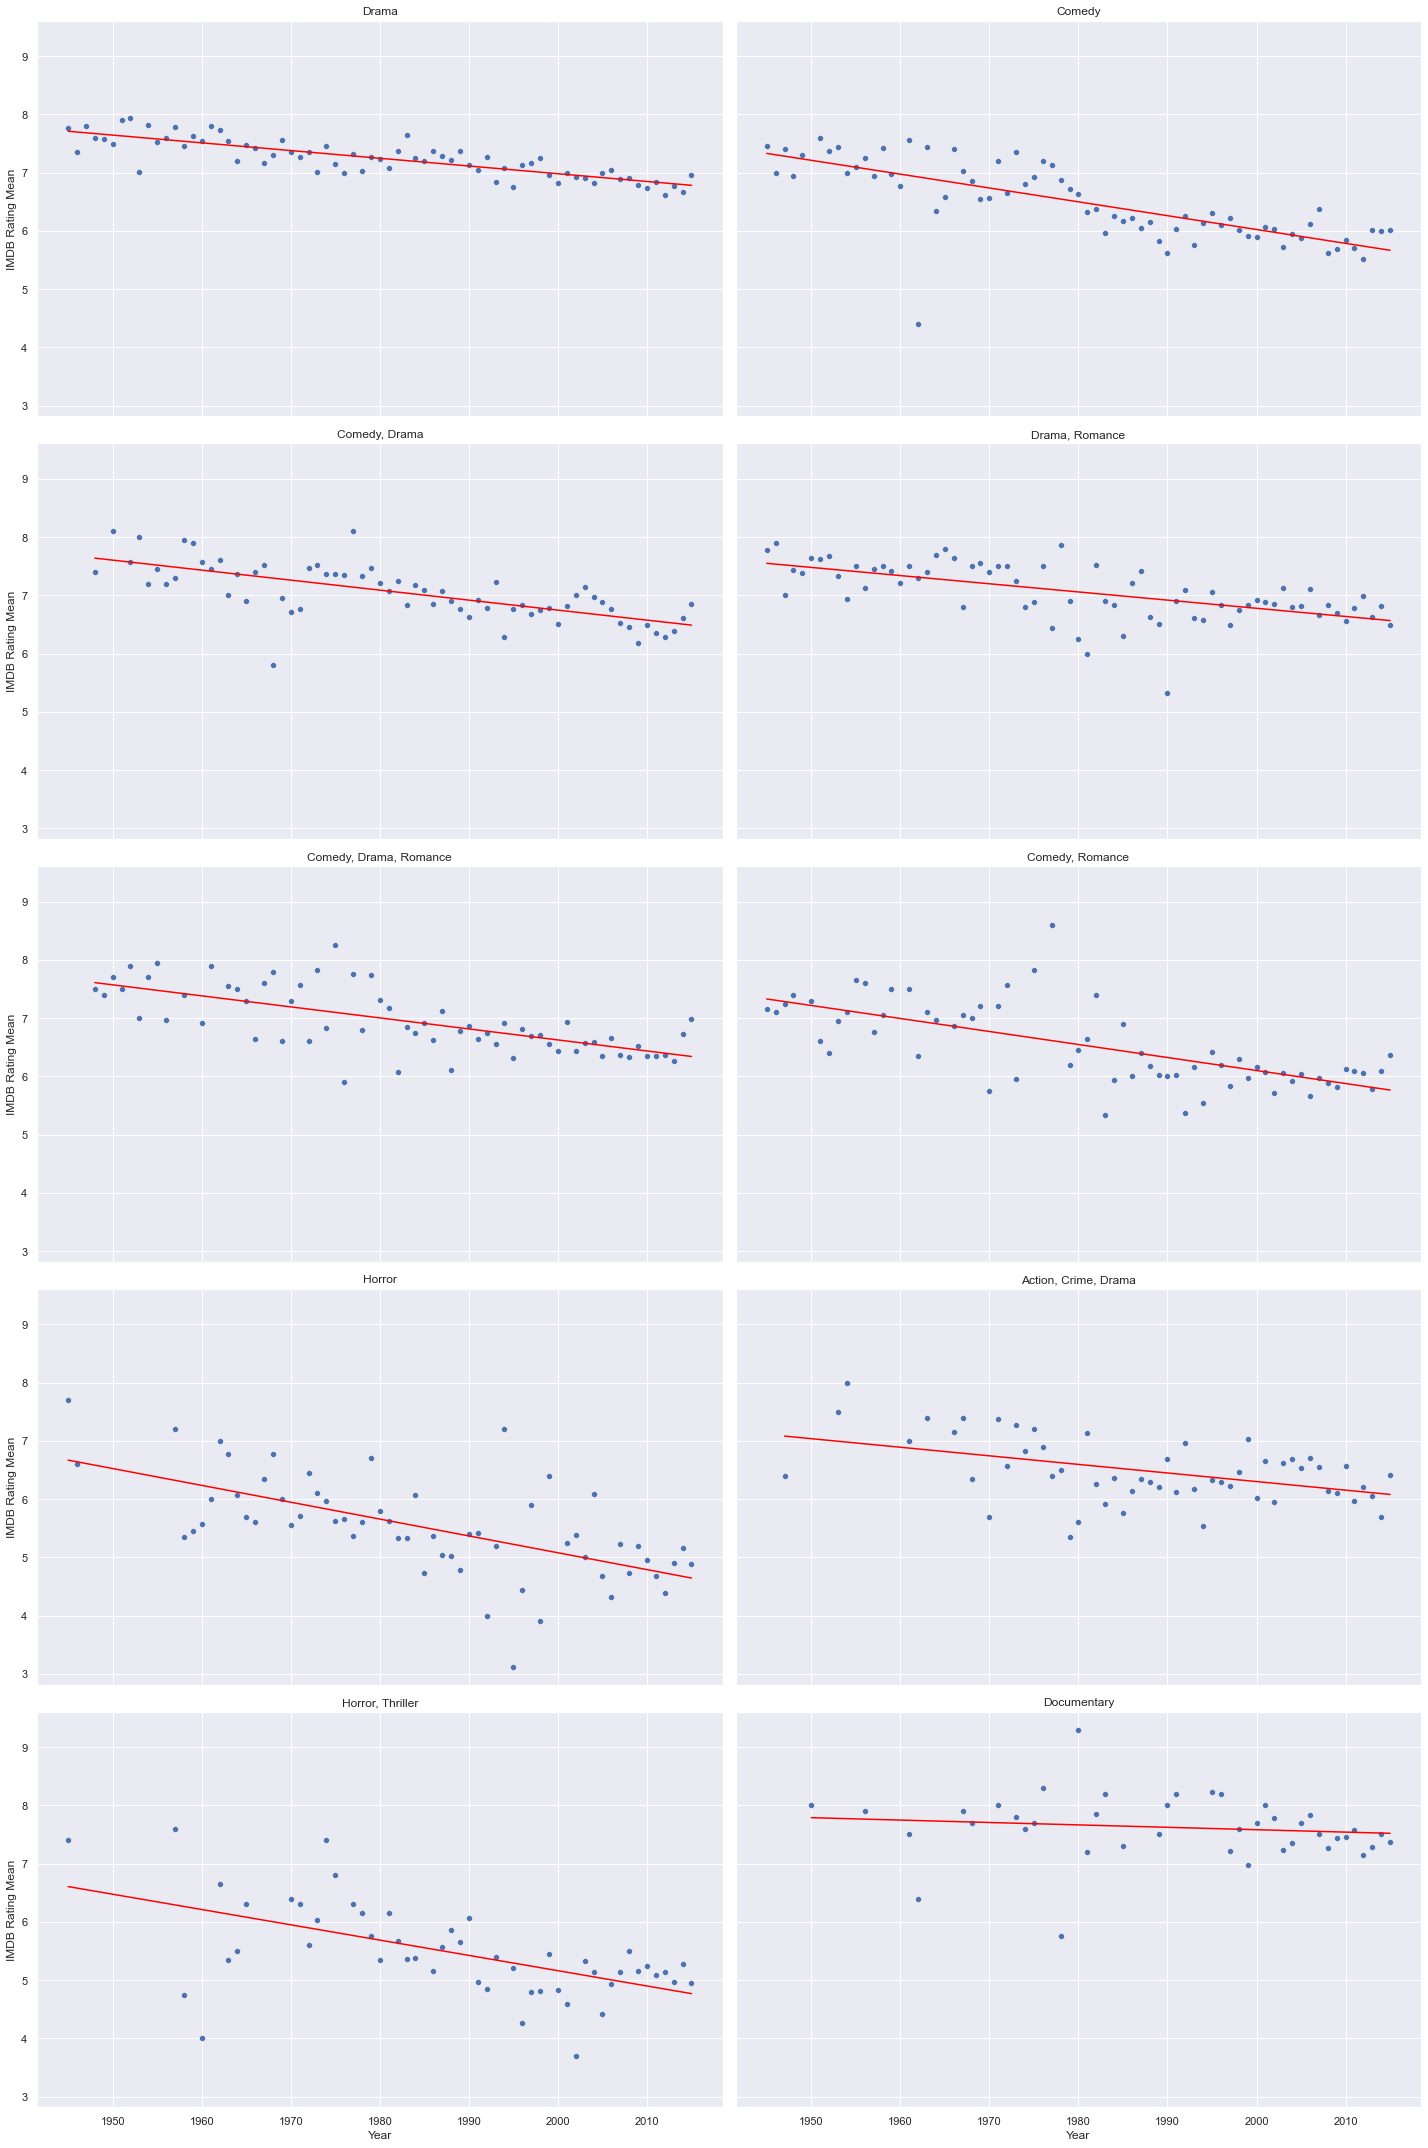

In [675]:
import scipy

genre_counts = df["genre"].value_counts().head(10)
genres = genre_counts.index.tolist()

fig, ax = plt.subplots(5, 2, figsize=(20, 30), sharex=True, sharey=True)
ax = ax.flatten()
for i, genre in enumerate(genres):
    df_genre = df[df["genre"] == genre]
    df_mean = df_genre[df_genre['imdbRating'].notna()]
    df_mean = df_mean.where(df_mean["year"]>=1945)
    df_mean = df_mean.where(df_mean["year"]<=2016)
    df_mean = df_mean.groupby('year')['imdbRating'].mean().reset_index()
    sns.scatterplot(x="year", y="imdbRating", data=df_mean, ax=ax[i])
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_mean["year"], df_mean["imdbRating"])
    x = df_mean["year"]
    y = slope * x + intercept
    ax[i].plot(x, y, color="red")

    ax[i].set_title(genre)
    if i == 8 or i == 9:
        ax[i].set_xlabel("Year")
    if i == 0 or i == 2 or i == 4 or i == 6 or i == 8:
        ax[i].set_ylabel("IMDB Rating Mean")

plt.tight_layout()
plt.show()

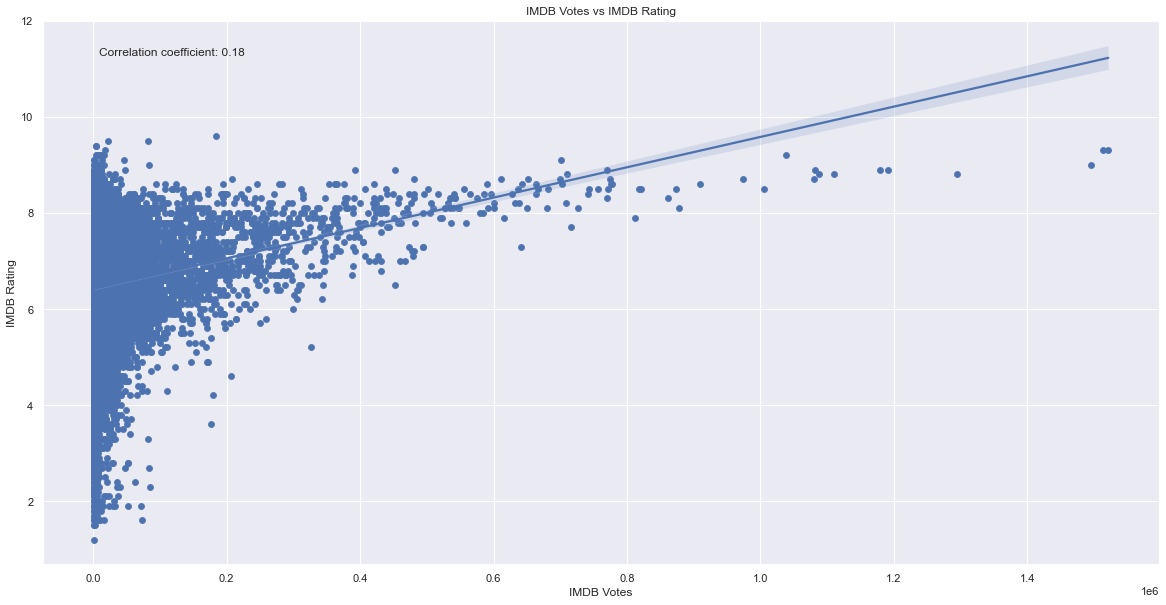

In [676]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="imdbVotes", y="imdbRating", data=df, ax=ax)
correlation_coefficient = df['imdbVotes'].corr(df['imdbRating'])
sns.regplot(x="imdbVotes", y="imdbRating", data=df, ax=ax)
text = "Correlation coefficient: {:.2f}".format(correlation_coefficient)
ax.text(0.05, 0.95, text, transform=ax.transAxes, verticalalignment='top')
plt.xlabel('IMDB Votes')
plt.ylabel('IMDB Rating')
plt.title('IMDB Votes vs IMDB Rating')
plt.show()

In [677]:
import plotly.express as px

fig = px.scatter(x=df["imdbVotes"],
                 y=df["imdbRating"],
                 hover_data=[df["title"], df["imdbRating"],df["year"]],
                 )

fig.update_layout(
    title="IMDB Votes vs IMDB Rating",
    xaxis_title="IMDB Votes",
    yaxis_title="IMDB Rating",
    font=dict(size=10),
    width=1000,
    height=800
)

fig.show()

In [678]:
df = df.dropna(subset=['country'])
df['country'] = df['country'].str.lower().str.strip().str.split(',')
df['country'] = df['country'].apply(lambda x: sorted(x))
df['country'] = df['country'].apply(lambda x: ','.join(x))

C:\Users\timos\AppData\Local\Temp\ipykernel_15072\1632660609.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\timos\AppData\Local\Temp\ipykernel_15072\1632660609.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\timos\AppData\Local\Temp\ipykernel_15072\1632660609.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [679]:
df["country"]

0                  usa
1                  usa
4               france
5               france
6               france
             ...      
45612     france,india
45664            india
45730            india
45888               uk
46008           turkey
Name: country, Length: 22140, dtype: object

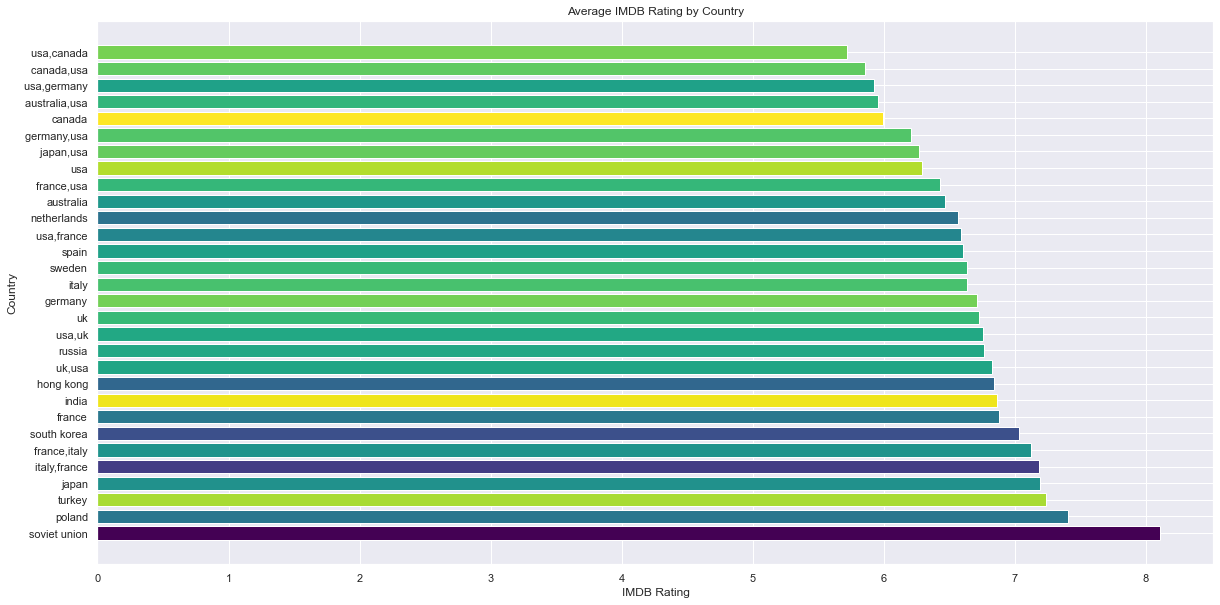

In [680]:
import matplotlib.cm as cm
df_country = df['country'].value_counts().head(30)
top_countries = df_country.index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]
avg_rating = df_top_countries.groupby('country')['imdbRating'].mean().reset_index()
std_dev = df_top_countries.groupby('country')['imdbRating'].std().reset_index()
avg_std = avg_rating.merge(std_dev, on='country')
avg_std = avg_std.sort_values(by='imdbRating_x', ascending=False)
plt.figure(figsize=(20, 10))
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=min(avg_std['imdbRating_y']), vmax=max(avg_std['imdbRating_y']))
colors = cmap(normalize(avg_std['imdbRating_y']))
plt.barh(avg_std['country'], avg_std['imdbRating_x'], color=colors)
plt.xlabel('IMDB Rating')
plt.ylabel('Country')
plt.title('Average IMDB Rating by Country')
plt.show()

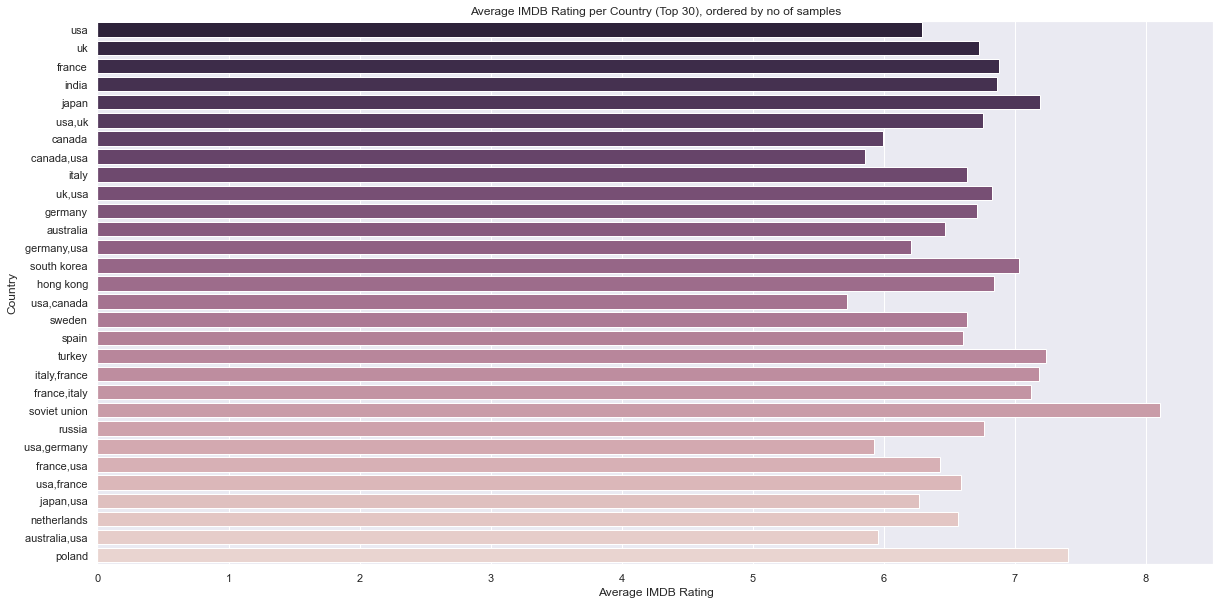

In [681]:
df_country = df['country'].value_counts().head(30)
occurece_df = df_country
top_countries = df_country.index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]
df_country = df_top_countries.groupby('country')['imdbRating'].mean().reset_index()
df_country = df_country.join(occurece_df, on=df_country["country"] , how='left', lsuffix='_left', rsuffix='_right')
df_country.sort_values(by="country_right",inplace=True,ascending=False)
plt.figure(figsize=(20, 10))

sns.barplot(x="imdbRating", y="country_left", data=df_country,palette=reversed(sns.cubehelix_palette(n_colors=len(df_country))))
plt.xlabel("Average IMDB Rating")
plt.ylabel("Country")
plt.title("Average IMDB Rating per Country (Top 30), ordered by no of samples")
plt.show()

In [682]:
df["awards"].value_counts()

1 nomination.                                               1692
1 win.                                                       986
2 nominations.                                               691
1 win & 1 nomination.                                        627
3 nominations.                                               381
                                                            ... 
Nominated for 2 Oscars. Another 4 wins & 22 nominations.       1
19 wins & 8 nominations.                                       1
Nominated for 8 Oscars. Another 4 wins & 3 nominations.        1
Won 6 Oscars. Another 38 wins & 27 nominations.                1
Won 5 Oscars. Another 18 wins & 12 nominations.                1
Name: awards, Length: 2770, dtype: int64

In [683]:
import re

def extract_noms_and_wins(string):
    if not isinstance(string, str):
        return 0
    integers = re.findall(r'\d+', string)
    integers = [int(i) for i in integers]
    return sum(integers)

df['nomsandwins']= df['awards'].apply(extract_noms_and_wins)

C:\Users\timos\AppData\Local\Temp\ipykernel_15072\2946958012.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 0.93, 'Top Movies by number of Won and Nominated Prices:')

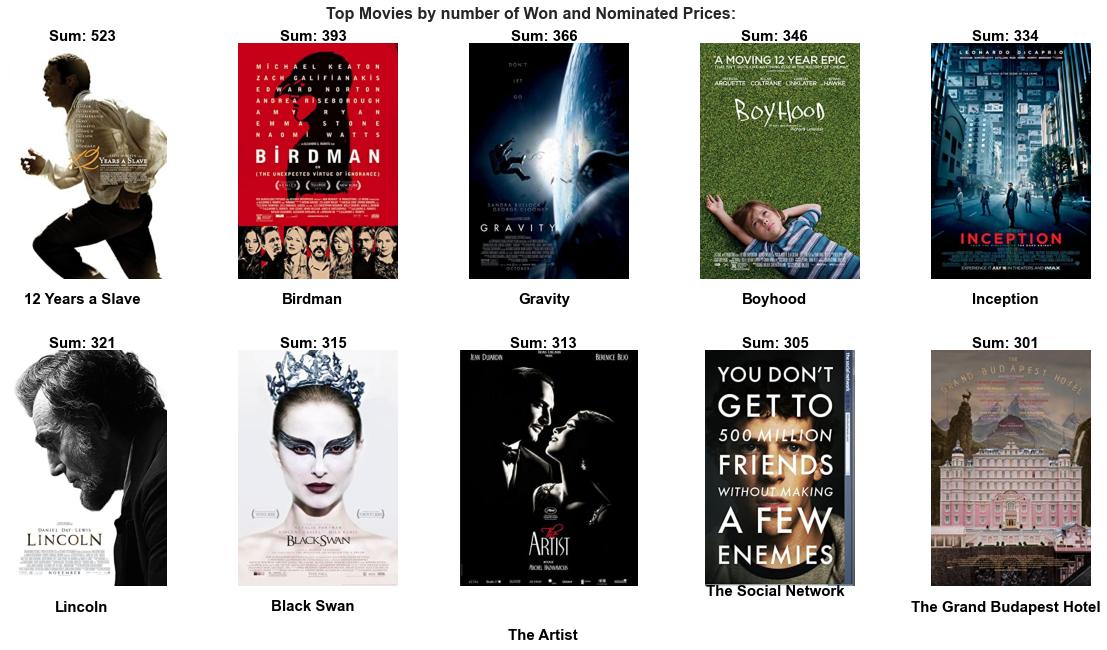

In [684]:
import urllib
df_removed = df.dropna(subset=['poster'])
# Get the top 10 films based on the nomsandwins column
top_10 = df_removed.nlargest(11, 'nomsandwins')
top_10.drop_duplicates(inplace=True, subset=["title"])
# Create a list of the URLs for the top 10 films
poster_urls = top_10['poster'].tolist()

# Download the images and store them as arrays
images = []
for url in poster_urls:
    with urllib.request.urlopen(url) as url:
        image = plt.imread(url, format='jpeg')
        images.append(image)

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i, image in enumerate(images):
    ax[i//5, i%5].imshow(image)
    ax[i//5, i%5].axis('off')
   
    ax[i//5, i%5].text(140, -5, "Sum: "+ str(top_10.iloc[i]['nomsandwins']), 
                      ha='center', fontsize=15, color='black', fontweight='bold')
    ax[i//5, i%5].text(140, 490, top_10.iloc[i]['title'].split(":")[0].strip(), 
                      ha='center', fontsize=15, color='black', fontweight='bold')
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Top Movies by number of Won and Nominated Prices:", fontweight='bold', fontsize=16, y=0.93)

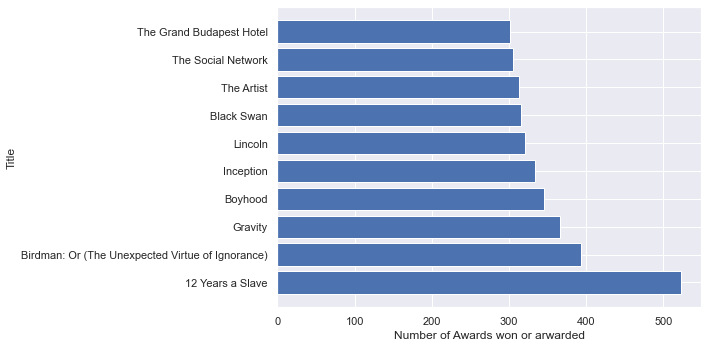

In [685]:
# Create a barplot of the nomsandwins column
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(y=top_10['title'], width=top_10['nomsandwins'])
ax.set_ylabel("Title")
ax.set_xlabel("Number of Awards won or arwarded")
plt.tight_layout()
plt.show()

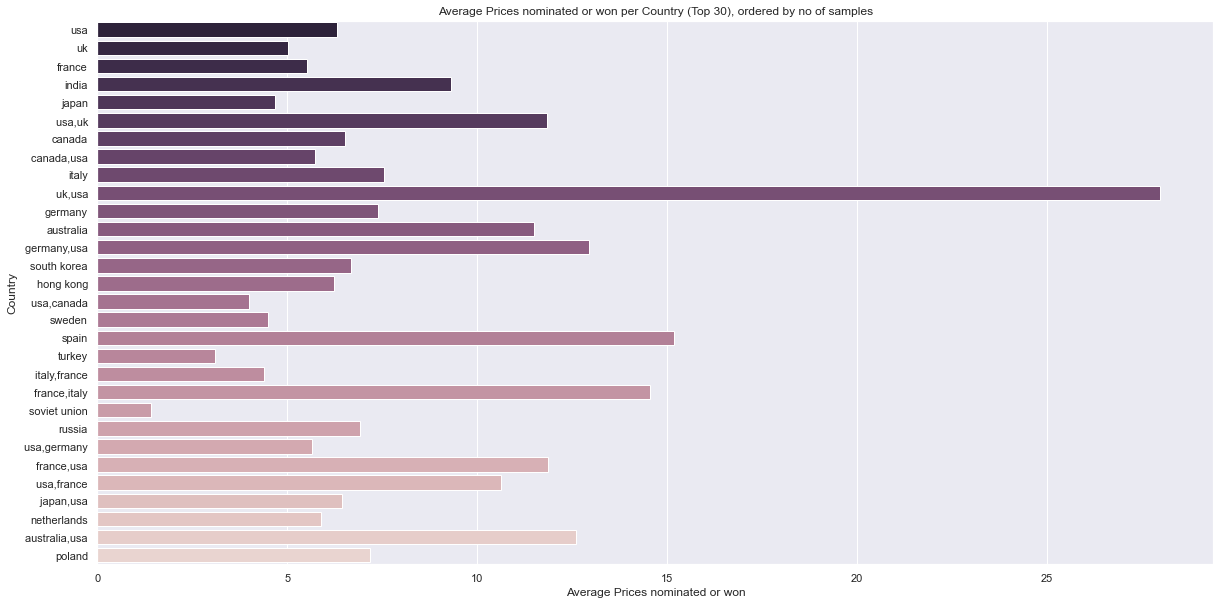

In [686]:
df_country = df['country'].value_counts().head(30)
occurece_df = df_country
top_countries = df_country.index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]
df_country = df_top_countries.groupby('country')['nomsandwins'].mean().reset_index()
df_country = df_country.join(occurece_df, on=df_country["country"] , how='left', lsuffix='_left', rsuffix='_right')
df_country.sort_values(by="country_right",inplace=True,ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x="nomsandwins", y="country_left", data=df_country,palette=reversed(sns.cubehelix_palette(n_colors=len(df_country))))
plt.xlabel("Average Prices nominated or won")
plt.ylabel("Country")
plt.title("Average Prices nominated or won per Country (Top 30), ordered by no of samples")
plt.show()

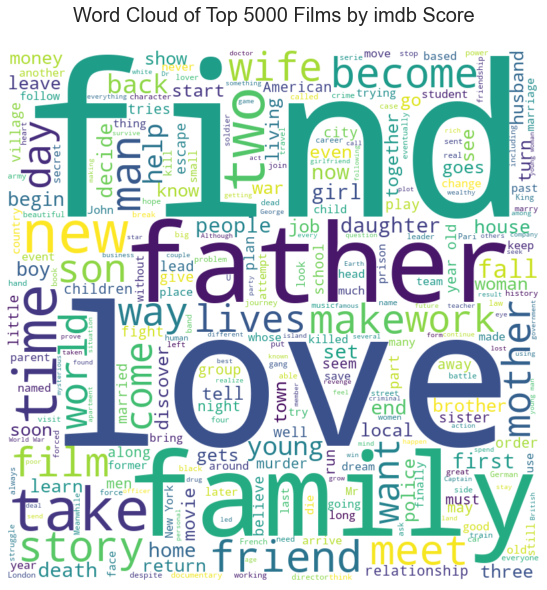

In [687]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add("one")
STOPWORDS.add("life")
STOPWORDS.add("live")
STOPWORDS.add("will")
df_top_500 = df.nlargest(5000, 'imdbRating')
df_top_500 = df_top_500.dropna(subset=['fullplot'])
text = ' '.join(df_top_500['fullplot'].tolist())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      width=800, height=800, max_words=300,
                      min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top 5000 Films by imdb Score\n", fontsize=20)
plt.tight_layout(pad=0)
plt.show()

C:\Users\timos\AppData\Local\Temp\ipykernel_15072\1054411225.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



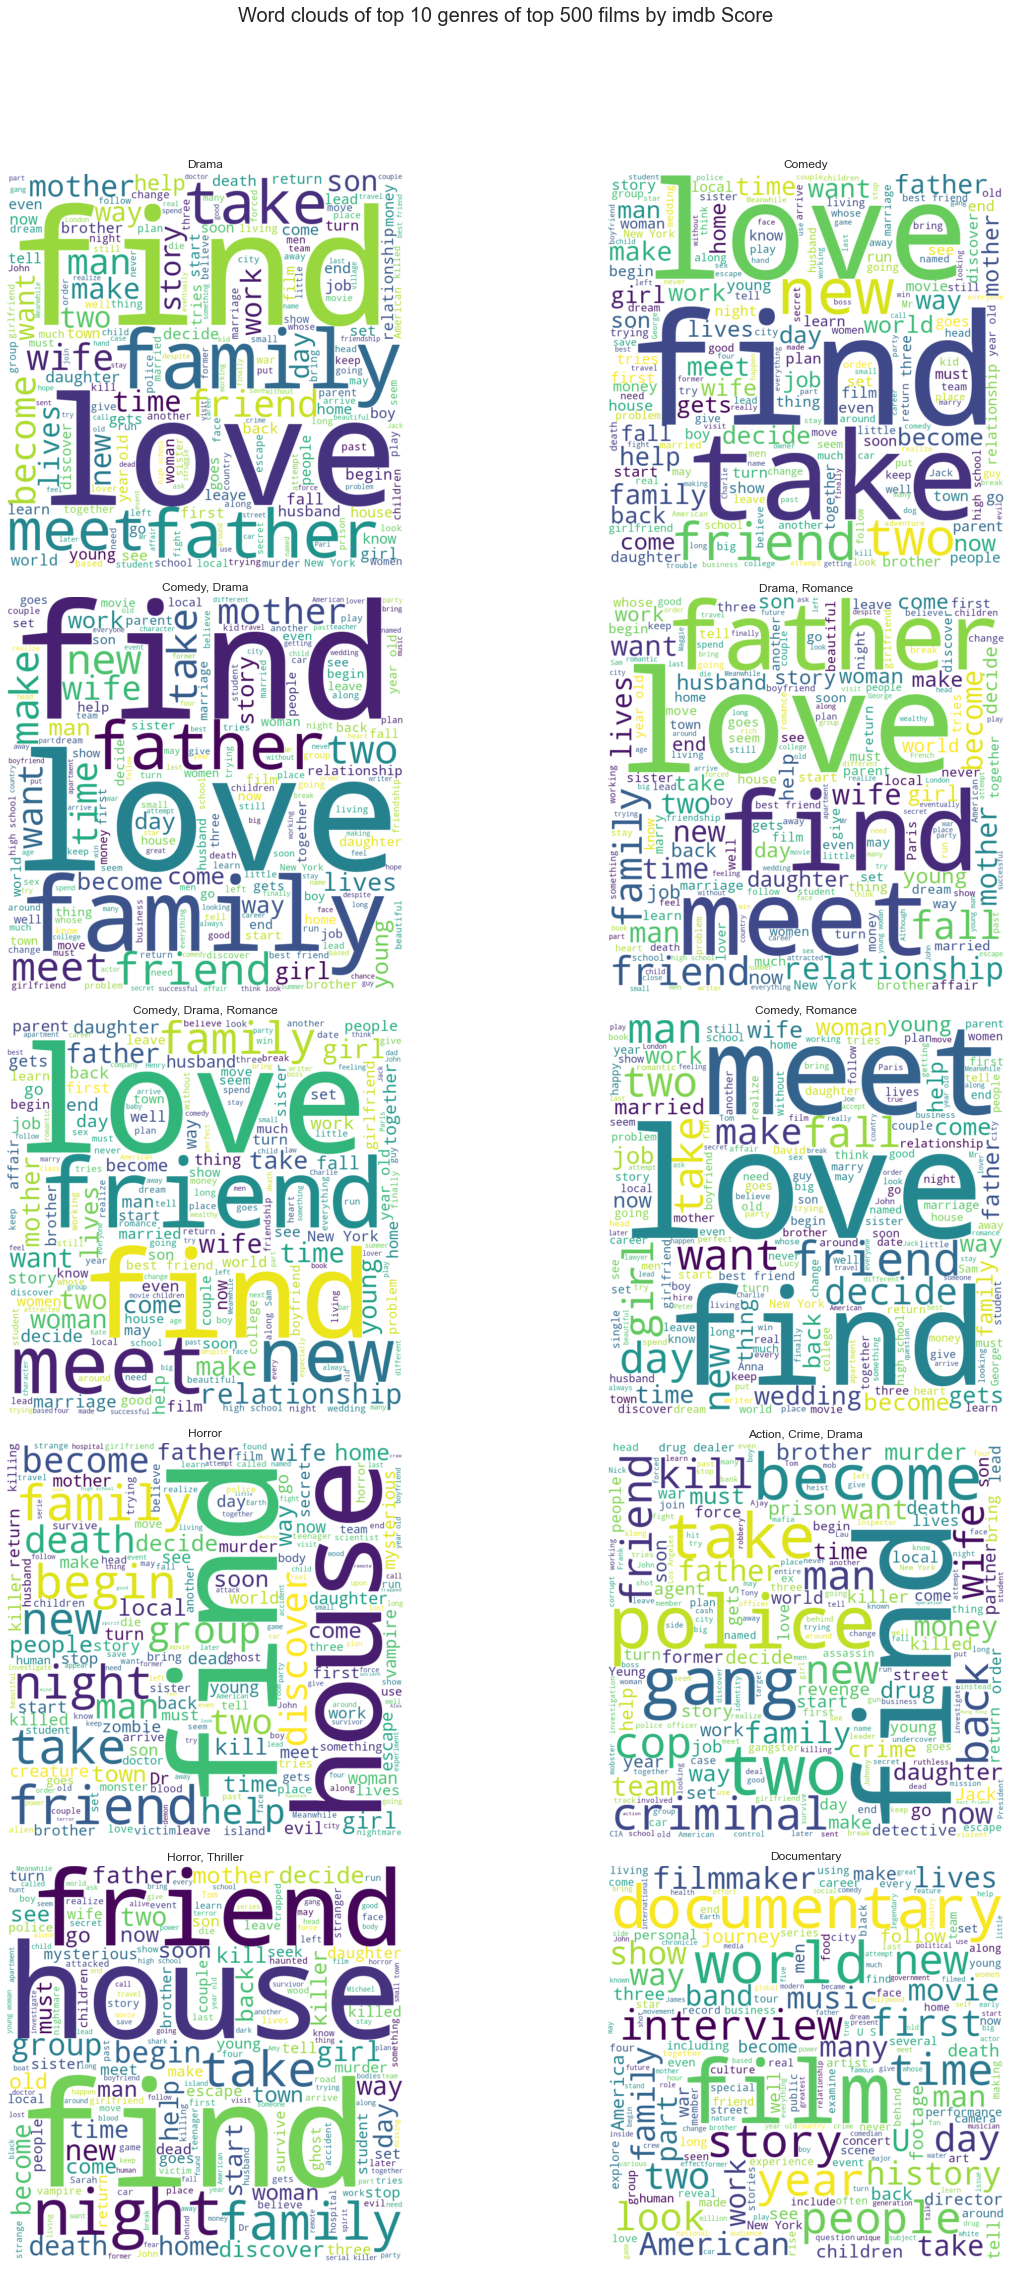

In [688]:
from collections import Counter
df_filtered = df.dropna(subset=['fullplot', 'genre',"imdbRating"])
df_filtered['genre'] = df_filtered['genre'].str.strip()
df_filtered = df_filtered[['fullplot', 'genre',"imdbRating"]].sort_values('imdbRating', ascending=False)
value_counts = df['genre'].value_counts()
top_genres = value_counts.head(10).index.tolist()
fig, ax = plt.subplots(5, 2, figsize=(20, 30))
ax = ax.ravel()
for i, genre in enumerate(top_genres):
    # Get the texts for the current genre
    genre_text = df_filtered[df_filtered['genre'].str.contains(genre)]['fullplot'].str.cat(sep=' ')

    # Create a word cloud for the current genre
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(genre_text)

    # Display the word cloud
    ax[i].imshow(wordcloud, interpolation='bilinear')
    ax[i].axis('off')
    ax[i].set_title(genre)

plt.suptitle("Word clouds of top 10 genres of top 500 films by imdb Score", fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

In [689]:
import nltk
from nltk import word_tokenize
from nltk.tag import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def get_nouns(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    nouns = [word for word, pos in tagged_words if pos in ['NN', 'NNS', 'NNP', 'NNPS']]
    return nouns
df_nouns = df 
df_nouns = df_nouns.dropna(subset=['fullplot'])
df_nouns['fullplot_nouns'] = df_nouns['fullplot'].apply(get_nouns)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\timos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\timos\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\timos\AppData\Local\Temp\ipykernel_15072\3264165375.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



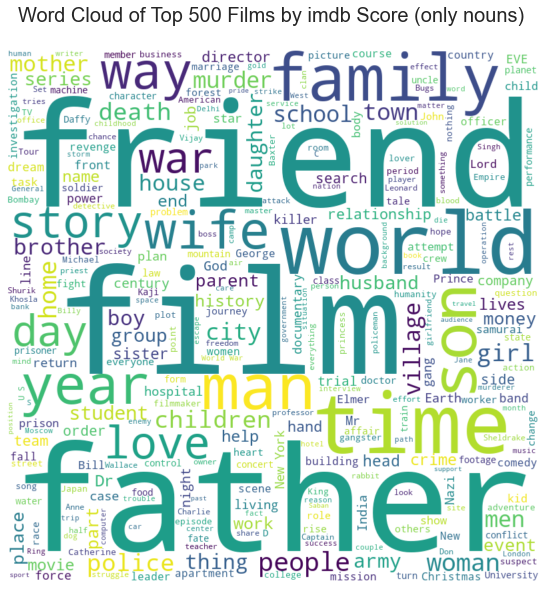

In [690]:
df_nouns = df_nouns.nlargest(500, 'imdbRating')
text = ""
for ele in df_nouns["fullplot_nouns"]:
     text = text + " ".join(ele)
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      width=800, height=800, max_words=300,
                      min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top 500 Films by imdb Score (only nouns) \n", fontsize=20)
plt.tight_layout(pad=0)
plt.show()

In [692]:
df_nouns

imdbID                   title  year     rating  runtime  \
20963  185906        Band of Brothers  2001      TV-MA  705 min   
22854  252487         The Chaos Class  1975        NaN   87 min   
29859  795176            Planet Earth  2006       TV-G   60 min   
14588   98769           The Civil War  1990        NaN  680 min   
22638   98769           The Civil War  1990        NaN  680 min   
...       ...                     ...   ...        ...      ...   
15565  104561  Jo Jeeta Wohi Sikandar  1992         PG  174 min   
15768  105695              Unforgiven  1992          R  131 min   
15806  106104         Prime Suspect 3  1993        NaN  207 min   
16511  110057             Hoop Dreams  1994      PG-13  170 min   
16521  110081                 To Live  1994  NOT RATED  125 min   

                           genre    released        director  \
20963     Action, Drama, History  2001-09-09             NaN   
22854              Comedy, Drama  1975-04-01   Ertem Egilmez   
29859                Documentary  2007-03-25             NaN   
14588  Documentary, History, War  1990-09-23             NaN   
22638  Documentary, History, War  1990-09-23             NaN   
...                          ...         ...             ...   
15565     Comedy, Drama, Romance  1992-05-22    Mansoor Khan   
15768                    Western  1992-08-07  Clint Eastwood   
15806      Crime, Drama, Mystery  1994-04-28             NaN   
16511  Documentary, Drama, Sport  1994-10-14     Steve James   
16521                 Drama, War  1994-12-01     Yimou Zhang   

                                                  writer  \
20963                                                NaN   
22854                    Umur Bugay, Rifat Ilgaz (novel)   
29859                                                NaN   
14588                                                NaN   
22638                                                NaN   
...                                                  ...   
15565  Nasir Hussain (dialogue), Mansoor Khan (screen...   
15768                                 David Webb Peoples   
15806                                                NaN   
16511                        Steve James, Frederick Marx   
16521  Wei Lu (screenplay), Hua Yu (novel), Hua Yu (s...   

                                                    cast  ...  \
20963  Scott Grimes, Matthew Leitch, Damian Lewis, Ro...  ...   
22854  Kemal Sunal, M�nir �zkul, Halit Ak�atepe, Tari...  ...   
29859               David Attenborough, Sigourney Weaver  ...   
14588  Sam Waterston, Julie Harris, Jason Robards, Mo...  ...   
22638  Sam Waterston, Julie Harris, Jason Robards, Mo...  ...   
...                                                  ...  ...   
15565  Aamir Khan, Ayesha Jhulka, Deepak Tijori, Pooj...  ...   
15768  Clint Eastwood, Gene Hackman, Morgan Freeman, ...  ...   
15806  Helen Mirren, Tom Bell, Karen Tomlin, David Th...  ...   
16511  William Gates, Arthur Agee, Emma Gates, Curtis...  ...   
16521                 You Ge, Li Gong, Ben Niu, Wu Jiang  ...   

                                                  poster  \
20963  https://m.media-amazon.com/images/M/MV5BMTI3OD...   
22854                                                NaN   
29859  https://m.media-amazon.com/images/M/MV5BNzA0NT...   
14588  https://m.media-amazon.com/images/M/MV5BMTc0NT...   
22638  https://m.media-amazon.com/images/M/MV5BMTc0NT...   
...                                                  ...   
15565                                                NaN   
15768  https://m.media-amazon.com/images/M/MV5BMTkzNT...   
15806  https://m.media-amazon.com/images/M/MV5BMjAyND...   
16511  https://m.media-amazon.com/images/M/MV5BMTk4OD...   
16521  https://m.media-amazon.com/images/M/MV5BMTQ0ND...   

                                                    plot  \
20963  The story of Easy Company of the US Army 101st...   
22854  Lazy, uneducated students share a very close b...   
29859  Emmy Award winning, 11-